In [1]:
import matplotlib.pyplot as plt

In [2]:
#import matplotlib.ticker as mticker
#from matplotlib.finance import candlestick_ohlc

In [3]:
from matplotlib import style

In [4]:
import matplotlib.animation as animation

In [5]:
import numpy as np

In [6]:
import urllib

In [7]:
import matplotlib.dates as mdate

In [8]:
x=[1,2,3]
y=[5,7,4]
x1=[1,2,3]
y1=[12,15,9]

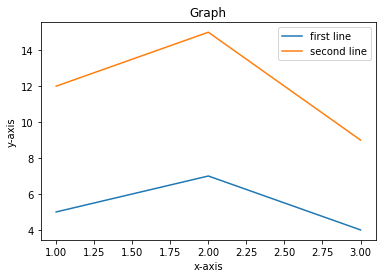

In [9]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Graph')
plt.plot(x,y,label='first line')
plt.plot(x1,y1,label='second line')
plt.legend()

# bar chart 

In [10]:
x=[2,4,6,8,10]
y=[6,3,6,3,7]

x1=[1,3,5,7,9]
y1=[7,3,6,9,1]

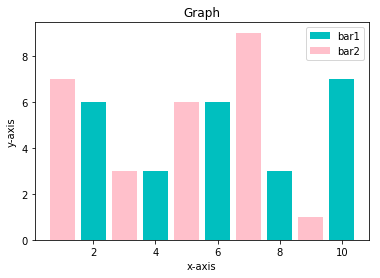

In [11]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Graph')
plt.bar(x,y,label='bar1',color='c')
plt.bar(x1,y1,label='bar2',color='pink')
plt.legend()

# historogram chart

In [12]:
age=[34,56,32,76,89,12,8,97,34,76,87,23,86,12,65,23,76,55,87,78,32,4,65,98,54,42,13,75,34,23]
bins=[0,10,20,30,40,50,60,70,80,90,100]

(array([2., 3., 3., 5., 1., 3., 2., 5., 4., 2.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

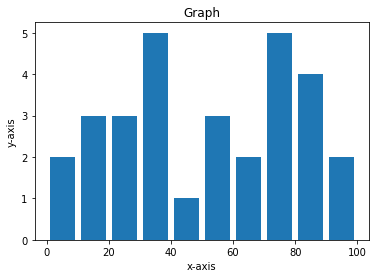

In [13]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Graph')
plt.hist(age,bins,histtype='bar',rwidth=0.8)

# scatter plot

In [14]:
x=[1,2,3,4,5,6,7,8]
y=[4,6,7,3,5,2,1,2]

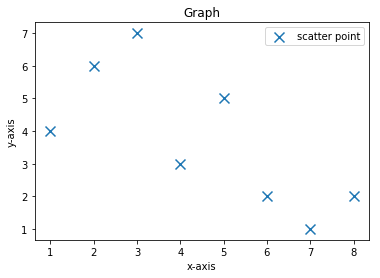

In [15]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Graph')
plt.scatter(x,y,label='scatter point',marker='x',s=100) # s=size 
plt.legend()

# stack plot

In [16]:
day = [1,2,3,4,5]
sleeping=[7,6,8,9,6]
eating=[2,3,1,4,2]
working=[7,8,9,3,2]
playing=[3,5,2,7,8]

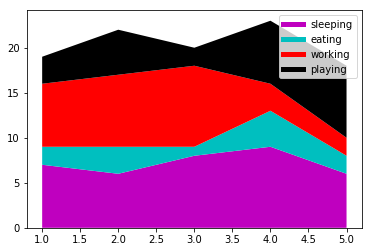

In [17]:
plt.plot([],[],color='m',label='sleeping',linewidth=5)
plt.plot([],[],color='c',label='eating',linewidth=5)
plt.plot([],[],color='r',label='working',linewidth=5)
plt.plot([],[],color='k',label='playing',linewidth=5)
plt.stackplot(day,sleeping,eating,working,playing, colors=['m','c','r','k'])
plt.legend()

# pie chart

In [18]:
day = [1,2,3,4,5]
sleeping=[7,6,8,9,6]
eating=[2,3,1,4,2]
working=[7,8,9,3,2]
playing=[3,5,2,7,8]

([<matplotlib.patches.Wedge at 0x8ad1d30>,
 [Text(-0.952628,0.55,'sleeping'),
  Text(-0.771345,-0.919253,'eating'),
  Text(7.72421e-08,-1.1,'working'),
  Text(1.08329,0.191013,'playing')],
 [Text(-0.519615,0.3,'33.3%'),
  Text(-0.449951,-0.536231,'11.1%'),
  Text(4.2132e-08,-0.6,'11.1%'),
  Text(0.590885,0.104189,'44.4%')])

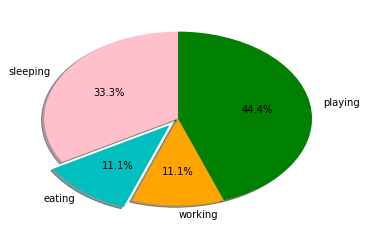

In [19]:
slices=[6,2,2,8]
activetes=['sleeping','eating','working','playing']
cols=['pink','c','orange','green']
plt.pie(slices,
        labels=activetes,
        colors=cols,
        startangle=90,
        shadow=True,
        explode=(0,0.1,0,0),
        autopct='%1.1f%%')

#  load data from file

In [20]:
x,y=np.loadtxt('E:\\project_data\\example.txt',delimiter=',',unpack=True)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Graph')
plt.plot(x,y,label='load from file')
plt.legend()

IOError: E:\project_data\example.txt not found.

#  data from internet

In [ ]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdate.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data():
    ax1=plt.subplot2grid((1,0),(0,0))
    
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    #stock_price_url ='http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quota;range=10y/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()

    stock_data = []
    split_source = source_code.split('\n')

    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'Volume' not in line:
                stock_data.append(line)

    date, openp, highp, lowp, closep, adjustedp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
    
                                                                     converters={0: bytespdate2num('%Y-%m-%d')}            )

    ax1.plot_date(date, closep, '-',label='price')
    plt.plot([],[],label='gain',color='g',alpha=0.5)
    plt.plot([],[],label='loss',color='r',alpha=0.5)
    ax1.fill_between(date,closep,closep[0],where=(closep > closep[0]),alpha=0.3,color='g')
    ax1.fill_between(date,closep,closep[0],where=(closep < closep[0]),alpha=0.3,color='r')
    plt.xticks(rotation=45) #for roteting date at x-axis 
    plt.grid(True)
    
    style.use('dark_background')
    ax1.spines['left'].set_color('c')# use for border color for left side 
    ax1.spines['top'].set_visible(False) # use for remove border from top
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_linewidth(5) # USE FOR CHANGE WIDTH OF BORDER
    ax1.tick_params(axis='x',colors ='#E93B26')# change label color of x-axis
    ax1.axhline(closep[0],color='k',linewidth=2)# use for change mid line color and width
    ax1.xaxis.label.set_color('r')
    ax1.yaxis.label.set_color('g')
    ax1.set_yticks([0,200,400,600,800])
    
    
    plt.subplots_adjust(left=0.09,bottom=0.20,right=0.94,top=0.90,wspace=0.2,hspace=0)
    plt.xlabel('date')
    plt.ylabel('price')
    plt.title('Interesting graph\nCheck it out')
    plt.legend()
    
graph_data()

In [ ]:
print(plt.style.available)

In [ ]:
print(plt.__file__)

# live graph

In [ ]:
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)

def animat(i):
    graph_data=open('E:\\project_data\\example.txt','r').read()
    lines = graph_data.split('\n')
    xs=[]
    ys=[]
    for line in lines:
        if(len(line)>1):
            x,y=line.split(',')
            xs.append(x)
            ys.append(y)
    ax1.clear()
    style.use('dark_background')
    ax1.plot(xs,ys)
    
ani=animation.FuncAnimation(fig,animat,interval=1)
plt.tight_layout()